In [1]:
import tweepy
import pandas as pd
import numpy as np
import json
import re
import warnings
warnings.filterwarnings('ignore')

### Establishing the connection
Created and Application in Twitter Developer account as Assessed-task-2 & copied the keyboard.

In [2]:
# Application creds made in developer account ...

consumer_key = 'jIXCU53opEikJKYRWK633SRTd'
consumer_key_secret = 'NTx4NDFUfJMuAZwg7DX4kRW7ZMpWUYUe8ZXi7fH8C5jWHhn4UZ'
access_token = '1371716702-hRzyepHlBcKVTvhI0W6Npdd7p78GjHEZb4w9v0y'
access_token_secret = 'JdvZubB0HLeqRY7qJLZ7oFZH2q9R2BPInDZ30TVEWnM7q'

auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
# Authorisation of API key and API key secret.
auth.set_access_token(access_token, access_token_secret)
# Set access to user's access token and access token secret.
api = tweepy.API(auth)
# The API class provides access to the Twitter RESTful API method.

### Testing the connection

In [3]:
# Testing the authentication.
try:
    user = api.verify_credentials()
    print('Authentication OK.')
except:
    print('Error during authentication.')


Authentication OK.


## Task 1
Collect 400 tweets from two different Twitter users **(Australian politicians)**, 200 from each.  You should try to find two politicians where you would expect there to be some noticeable differences in their tweets.

**Selected politician for the Assessments:**<br>
Malcolm Turnbull with Screen name: @TurnbullMalcolm    *-Former PM of Australia. (2014-2018)*<br>
Kevin Rudd with Screen name: @MrKRudd      -* Former PM of Australia.*

#### Collecting first 200 tweets of Malcolm Turnbull with Screen name: @TurnbullMalcolm 

In [4]:
max_tweets = 200
screen_name = '@TurnbullMalcolm'
tweets_Malcolm = api.user_timeline(screen_name = screen_name, tweet_mode = 'extended', count = max_tweets)

In [5]:
Malcolm = []
for tweet in tweets_Malcolm:
    Malcolm.append(tweet._json)

with open('Data_scrapped/TurnbullMalcolm.json', mode = 'w') as file:
    file.write(json.dumps(Malcolm , indent = 4))

#### Collecting first 200 tweets of Malcolm Turnbull with Screen name: @TurnbullMalcolm 

In [6]:
max_tweets = 200
screen_name = '@MrKRudd'
tweets_Rudd = api.user_timeline(screen_name = screen_name,tweet_mode = 'extended', count = max_tweets)

In [7]:
Rudd = []
for tweet in tweets_Rudd:
    Rudd.append(tweet._json)
    
with open('Data_scrapped/MrKRudd.json', mode = 'w') as file:
    file.write(json.dumps(Rudd , indent = 4))

# Task 2
Use pandas to plot the posting times of the tweets for the two users in one bar chart; the aim of the plot is to distinguish the two users.

#### Creating listing for Malcolm

In [8]:
#listing the Malcolm Tweets and timings
Malcolm = []
with open('Data_scrapped/TurnbullMalcolm.json', encoding = 'utf-8', mode = 'r') as file:
        Malcolm_list = json.load(file)
        for dict in Malcolm_list:
             Malcolm.append({'user_id':str(dict['user']['name']),
                           'post_time':dict['created_at'],
                          'tweet':str(dict['full_text']),  
             })

In [9]:
Malcolm_df = pd.DataFrame(Malcolm , columns = ['user_id','post_time','tweet', ])
Malcolm_df.head(10)

,user_id,post_time,tweet
0,Malcolm Turnbull 💉💉,Tue Oct 12 22:43:30 +0000 2021,RT @SmartEnergyCncl: The world's watching. Our...
1,Malcolm Turnbull 💉💉,Tue Oct 12 21:08:20 +0000 2021,@cameronwilson @HonJulieBishop Only slightly s...
2,Malcolm Turnbull 💉💉,Tue Oct 12 21:03:10 +0000 2021,@NickMGreen @GrogsGamut @abcnews 2015 testimon...
3,Malcolm Turnbull 💉💉,Tue Oct 12 20:47:08 +0000 2021,"The second, paperback, edition of my memoir #a..."
4,Malcolm Turnbull 💉💉,Tue Oct 12 20:45:58 +0000 2021,"The second, paperback, edition of my memoir #a..."
5,Malcolm Turnbull 💉💉,Tue Oct 12 20:07:40 +0000 2021,Listening to @abcnews just now - says the Fren...
6,Malcolm Turnbull 💉💉,Tue Oct 12 03:08:32 +0000 2021,RT @alexbhturnbull: Chinese politics and your ...
7,Malcolm Turnbull 💉💉,Tue Oct 12 00:43:30 +0000 2021,China singling out Australian coal is a sign o...
8,Malcolm Turnbull 💉💉,Tue Oct 12 00:38:13 +0000 2021,@ChristineMilne @SmartEnergyCncl Absolutely! P...
9,Malcolm Turnbull 💉💉,Mon Oct 11 08:45:24 +0000 2021,"RT @franceinfo: Le nouvel album d'Astérix, ""As..."


In [10]:
#checking only 200 rows are fetched here.
Malcolm_df.shape

(200, 3)

In [11]:
Malcolm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    200 non-null    object
 1   post_time  200 non-null    object
 2   tweet      200 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


In [12]:
#Need to change the datatype further for plotting post time,Hour
Malcolm_df['post_time'] = pd.to_datetime(Malcolm_df['post_time'])
Malcolm_df['hour'] = Malcolm_df['post_time'].dt.hour

In [13]:
Malcolm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   user_id    200 non-null    object             
 1   post_time  200 non-null    datetime64[ns, UTC]
 2   tweet      200 non-null    object             
 3   hour       200 non-null    int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 6.4+ KB


#### Creating lisitng for MrKRudd

In [14]:
#listing the Malcolm Tweets and timings
Rudd = []
with open('Data_scrapped/MrKRudd.json', encoding = 'utf-8', mode = 'r') as file:
        Rudd_list = json.load(file)
        for dict in Rudd_list:
             Rudd.append({'user_id':str(dict['user']['name']),
                           'post_time':dict['created_at'],
                          'tweet':str(dict['full_text']),  
             })

In [15]:
Rudd_df = pd.DataFrame(Rudd , columns = ['user_id','post_time','tweet', ])
Rudd_df.head(10)

,user_id,post_time,tweet
0,Kevin Rudd,Wed Oct 13 02:08:32 +0000 2021,Prepare for more of this sort of fearless &amp...
1,Kevin Rudd,Tue Oct 12 23:08:15 +0000 2021,Cynically pretend to one audience you now supp...
2,Kevin Rudd,Tue Oct 12 02:59:41 +0000 2021,You know Morrison has really gone beyond the p...
3,Kevin Rudd,Tue Oct 12 01:23:00 +0000 2021,Murdoch is today predicting an investment bona...
4,Kevin Rudd,Mon Oct 11 22:51:00 +0000 2021,Murdoch now says that decarbonising the econom...
5,Kevin Rudd,Mon Oct 11 20:03:00 +0000 2021,Murdoch spent years working hand-in-glove with...
6,Kevin Rudd,Mon Oct 11 10:54:06 +0000 2021,"Murdoch now says deploying green technology, l..."
7,Kevin Rudd,Mon Oct 11 06:50:00 +0000 2021,Murdoch should crawl back into his crypt… How ...
8,Kevin Rudd,Mon Oct 11 05:09:17 +0000 2021,"Murdoch is now drowning in greenwash, giving p..."
9,Kevin Rudd,Mon Oct 11 00:37:59 +0000 2021,"What a total bucket of greenwash from Murdoch,..."


In [16]:
#checking only 200 rows are fetched here.
Rudd_df.shape

(200, 3)

In [17]:
Rudd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    200 non-null    object
 1   post_time  200 non-null    object
 2   tweet      200 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


In [18]:
#Need to change the datatype further for plotting post time,Hour
Rudd_df['post_time'] = pd.to_datetime(Rudd_df['post_time'])
Rudd_df['hour'] = Rudd_df['post_time'].dt.hour

In [19]:
Rudd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   user_id    200 non-null    object             
 1   post_time  200 non-null    datetime64[ns, UTC]
 2   tweet      200 non-null    object             
 3   hour       200 non-null    int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 6.4+ KB


### Listing Both Twitter Account to one table

In [20]:
df = pd.concat([Malcolm_df,Rudd_df], axis=0).reset_index()
df

,index,user_id,post_time,tweet,hour
0,0,Malcolm Turnbull 💉💉,2021-10-12 22:43:30+00:00,RT @SmartEnergyCncl: The world's watching. Our...,22
1,1,Malcolm Turnbull 💉💉,2021-10-12 21:08:20+00:00,@cameronwilson @HonJulieBishop Only slightly s...,21
2,2,Malcolm Turnbull 💉💉,2021-10-12 21:03:10+00:00,@NickMGreen @GrogsGamut @abcnews 2015 testimon...,21
3,3,Malcolm Turnbull 💉💉,2021-10-12 20:47:08+00:00,"The second, paperback, edition of my memoir #a...",20
4,4,Malcolm Turnbull 💉💉,2021-10-12 20:45:58+00:00,"The second, paperback, edition of my memoir #a...",20
...,...,...,...,...,...
395,195,Kevin Rudd,2021-08-15 11:58:19+00:00,"This is unbelievable, potentially lethal negli...",11
396,196,Kevin Rudd,2021-08-14 10:49:10+00:00,"Yes Premier, it is a war. And it was an avoida...",10
397,197,Kevin Rudd,2021-08-14 06:08:54+00:00,"Any other state govt, had they been confronted...",6
398,198,Kevin Rudd,2021-08-14 03:37:14+00:00,For people with vision impairment or low visio...,3


### Plotting the Bar Graph

Text(0.5, 0, 'Time')

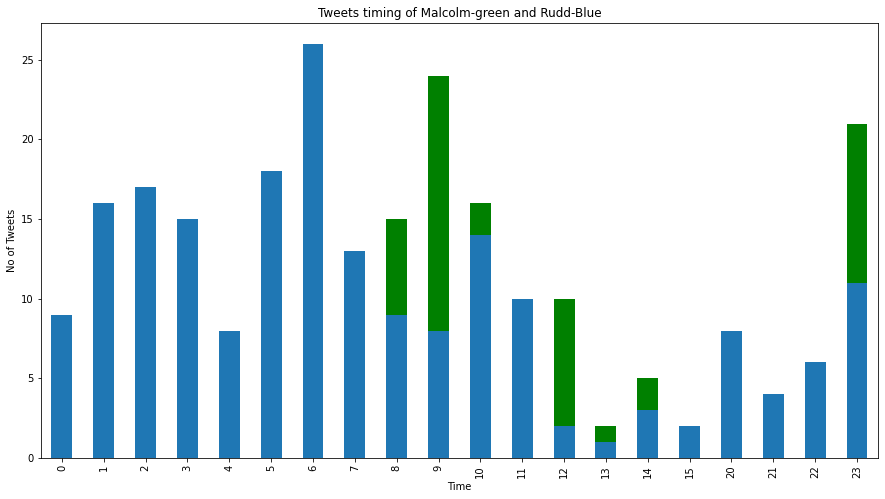

In [28]:
ax1 = Malcolm_df['hour'].value_counts().sort_index().plot.bar(figsize = (15, 8), color = 'green')
ax2 = Rudd_df['hour'].value_counts().sort_index().plot.bar(figsize = (15, 8))
ax1.set_title('Tweets timing of Malcolm-green and Rudd-Blue')
ax1.set_ylabel('No of Tweets')
ax1.set_xlabel('Time')

## Task 3

Use pandas to construct one bar chart of the proportions of tweets for each of the two users that contain pictures or links.

In [32]:
#using regular expression to filter it out
df['text_without_links'] = df['tweet'].str.replace('http\S+|www.\S+', '', case = False)
df

,index,user_id,post_time,tweet,hour,text_without_links
0,0,Malcolm Turnbull 💉💉,2021-10-12 22:43:30+00:00,RT @SmartEnergyCncl: The world's watching. Our...,22,RT @SmartEnergyCncl: The world's watching. Our...
1,1,Malcolm Turnbull 💉💉,2021-10-12 21:08:20+00:00,@cameronwilson @HonJulieBishop Only slightly s...,21,@cameronwilson @HonJulieBishop Only slightly s...
2,2,Malcolm Turnbull 💉💉,2021-10-12 21:03:10+00:00,@NickMGreen @GrogsGamut @abcnews 2015 testimon...,21,@NickMGreen @GrogsGamut @abcnews 2015 testimon...
3,3,Malcolm Turnbull 💉💉,2021-10-12 20:47:08+00:00,"The second, paperback, edition of my memoir #a...",20,"The second, paperback, edition of my memoir #a..."
4,4,Malcolm Turnbull 💉💉,2021-10-12 20:45:58+00:00,"The second, paperback, edition of my memoir #a...",20,"The second, paperback, edition of my memoir #a..."
...,...,...,...,...,...,...
395,195,Kevin Rudd,2021-08-15 11:58:19+00:00,"This is unbelievable, potentially lethal negli...",11,"This is unbelievable, potentially lethal negli..."
396,196,Kevin Rudd,2021-08-14 10:49:10+00:00,"Yes Premier, it is a war. And it was an avoida...",10,"Yes Premier, it is a war. And it was an avoida..."
397,197,Kevin Rudd,2021-08-14 06:08:54+00:00,"Any other state govt, had they been confronted...",6,"Any other state govt, had they been confronted..."
398,198,Kevin Rudd,2021-08-14 03:37:14+00:00,For people with vision impairment or low visio...,3,For people with vision impairment or low visio...


In [33]:
df['tweet_links'] = df['tweet'].apply(lambda x: re.findall(r"http\S+|www.\S+", x))
df

,index,user_id,post_time,tweet,hour,text_without_links,tweet_links
0,0,Malcolm Turnbull 💉💉,2021-10-12 22:43:30+00:00,RT @SmartEnergyCncl: The world's watching. Our...,22,RT @SmartEnergyCncl: The world's watching. Our...,[]
1,1,Malcolm Turnbull 💉💉,2021-10-12 21:08:20+00:00,@cameronwilson @HonJulieBishop Only slightly s...,21,@cameronwilson @HonJulieBishop Only slightly s...,[https://t.co/I6bCFbry7F]
2,2,Malcolm Turnbull 💉💉,2021-10-12 21:03:10+00:00,@NickMGreen @GrogsGamut @abcnews 2015 testimon...,21,@NickMGreen @GrogsGamut @abcnews 2015 testimon...,[]
3,3,Malcolm Turnbull 💉💉,2021-10-12 20:47:08+00:00,"The second, paperback, edition of my memoir #a...",20,"The second, paperback, edition of my memoir #a...","[https://t.co/QwpizSUqeL…, https://t.co/jW3rdV..."
4,4,Malcolm Turnbull 💉💉,2021-10-12 20:45:58+00:00,"The second, paperback, edition of my memoir #a...",20,"The second, paperback, edition of my memoir #a...",[https://t.co/xRlAdTzOuw]
...,...,...,...,...,...,...,...
395,195,Kevin Rudd,2021-08-15 11:58:19+00:00,"This is unbelievable, potentially lethal negli...",11,"This is unbelievable, potentially lethal negli...",[https://t.co/2OrI4HcfTU]
396,196,Kevin Rudd,2021-08-14 10:49:10+00:00,"Yes Premier, it is a war. And it was an avoida...",10,"Yes Premier, it is a war. And it was an avoida...",[https://t.co/DtN7bidSTs]
397,197,Kevin Rudd,2021-08-14 06:08:54+00:00,"Any other state govt, had they been confronted...",6,"Any other state govt, had they been confronted...",[https://t.co/KEDIkbR4X4]
398,198,Kevin Rudd,2021-08-14 03:37:14+00:00,For people with vision impairment or low visio...,3,For people with vision impairment or low visio...,[https://t.co/kln3OYkpy6]


In [34]:
linked_tweet = df['tweet'].apply(lambda x: re.findall(r"http\S+|www.\S+", x))
linked_tweet

0                                                     []
1                              [https://t.co/I6bCFbry7F]
2                                                     []
3      [https://t.co/QwpizSUqeL…, https://t.co/jW3rdV...
4                              [https://t.co/xRlAdTzOuw]
                             ...                        
395                            [https://t.co/2OrI4HcfTU]
396                            [https://t.co/DtN7bidSTs]
397                            [https://t.co/KEDIkbR4X4]
398                            [https://t.co/kln3OYkpy6]
399                            [https://t.co/ry9VqYSLGQ]
Name: tweet, Length: 400, dtype: object

In [36]:
df['links_boolean'] = df['tweet'].apply(lambda x: re.findall(r"http\S+|www.\S+", x)).apply((lambda x: len(x) != 0))
df = df.reset_index()                                 
df

,level_0,index,user_id,post_time,tweet,hour,text_without_links,tweet_links,links_boolean
0,0,0,Malcolm Turnbull 💉💉,2021-10-12 22:43:30+00:00,RT @SmartEnergyCncl: The world's watching. Our...,22,RT @SmartEnergyCncl: The world's watching. Our...,[],False
1,1,1,Malcolm Turnbull 💉💉,2021-10-12 21:08:20+00:00,@cameronwilson @HonJulieBishop Only slightly s...,21,@cameronwilson @HonJulieBishop Only slightly s...,[https://t.co/I6bCFbry7F],True
2,2,2,Malcolm Turnbull 💉💉,2021-10-12 21:03:10+00:00,@NickMGreen @GrogsGamut @abcnews 2015 testimon...,21,@NickMGreen @GrogsGamut @abcnews 2015 testimon...,[],False
3,3,3,Malcolm Turnbull 💉💉,2021-10-12 20:47:08+00:00,"The second, paperback, edition of my memoir #a...",20,"The second, paperback, edition of my memoir #a...","[https://t.co/QwpizSUqeL…, https://t.co/jW3rdV...",True
4,4,4,Malcolm Turnbull 💉💉,2021-10-12 20:45:58+00:00,"The second, paperback, edition of my memoir #a...",20,"The second, paperback, edition of my memoir #a...",[https://t.co/xRlAdTzOuw],True
...,...,...,...,...,...,...,...,...,...
395,395,195,Kevin Rudd,2021-08-15 11:58:19+00:00,"This is unbelievable, potentially lethal negli...",11,"This is unbelievable, potentially lethal negli...",[https://t.co/2OrI4HcfTU],True
396,396,196,Kevin Rudd,2021-08-14 10:49:10+00:00,"Yes Premier, it is a war. And it was an avoida...",10,"Yes Premier, it is a war. And it was an avoida...",[https://t.co/DtN7bidSTs],True
397,397,197,Kevin Rudd,2021-08-14 06:08:54+00:00,"Any other state govt, had they been confronted...",6,"Any other state govt, had they been confronted...",[https://t.co/KEDIkbR4X4],True
398,398,198,Kevin Rudd,2021-08-14 03:37:14+00:00,For people with vision impairment or low visio...,3,For people with vision impairment or low visio...,[https://t.co/kln3OYkpy6],True


In [40]:
#Create new df to calculate proportion of tweet including pictures or links
Picture_df = df.groupby(['user_id','links_boolean']).size().reset_index(name ='count')
Picture_df['total'] = Picture_df.groupby(['user_id'])['count'].transform('sum')
Picture_df = Picture_df.sort_values(by=['total'], ascending=False)
Picture_df.head(10)

,user_id,links_boolean,count,total
0,Kevin Rudd,False,4,200
1,Kevin Rudd,True,196,200
2,Malcolm Turnbull 💉💉,False,151,200
3,Malcolm Turnbull 💉💉,True,49,200


In [43]:
Picture_df['percentage'] = [i / j * 100 for i,j in zip(Picture_df['count'], Picture_df['total'])]
Picture_df

,user_id,links_boolean,count,total,percentage
0,Kevin Rudd,False,4,200,2.0
1,Kevin Rudd,True,196,200,98.0
2,Malcolm Turnbull 💉💉,False,151,200,75.5
3,Malcolm Turnbull 💉💉,True,49,200,24.5


In [47]:
final_filter = ['user_id', 'percentage']
Picture_df_present = Picture_df[Picture_df['links_boolean'] == True]
Picture_df_present = Picture_df_present[final_filter]
Picture_df_present.head()

,user_id,percentage
1,Kevin Rudd,98.0
3,Malcolm Turnbull 💉💉,24.5


In [48]:
Picture_df_present.describe()

,percentage
count,2.000000
mean,61.250000
std,51.972348
min,24.500000
25%,42.875000
50%,61.250000
75%,79.625000
max,98.000000


Text(0.5, 0, 'User')

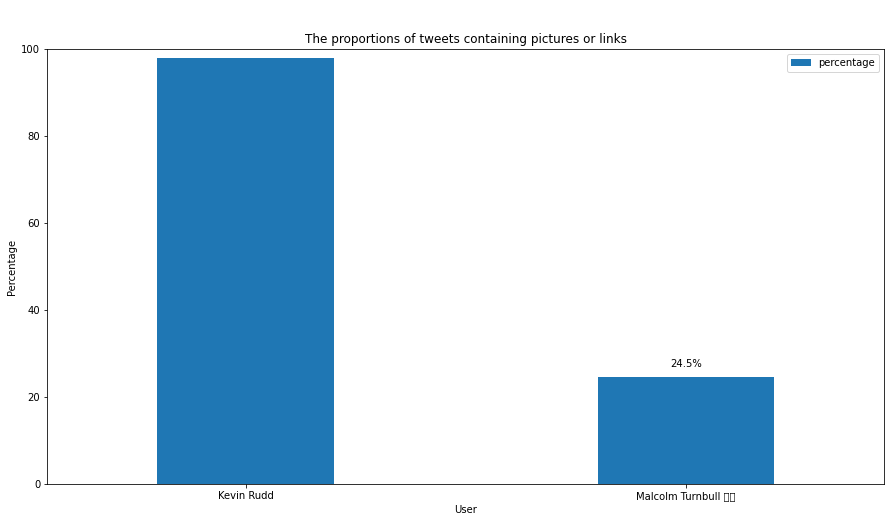

In [51]:
ax = Picture_df_present.plot(kind='bar', x='user_id', y= 'percentage', figsize=(15,8), width=0.4, rot=0)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height.round(2)}%', (x + width/2, y + height*1.1), ha='center')
ax.set_ylim(0, 100)
ax.set_title('The proportions of tweets containing pictures or links')
ax.set_ylabel('Percentage')
ax.set_xlabel('User')

## Task 4

Use pandas to construct a histogram of the number of hashtags in tweets for each of the two users.

In [53]:
df['hashtags'] = df['tweet'].apply(lambda x: re.findall(r"#(\w+)", x))
df['hashtags_count'] = df['tweet'].apply(lambda x: re.findall(r"#(\w+)", x)).apply((lambda x: len(x)))
df

,level_0,index,user_id,post_time,tweet,hour,text_without_links,tweet_links,links_boolean,hashtags,hashtags_count
0,0,0,Malcolm Turnbull 💉💉,2021-10-12 22:43:30+00:00,RT @SmartEnergyCncl: The world's watching. Our...,22,RT @SmartEnergyCncl: The world's watching. Our...,[],False,[RacetoZeroSummit],1
1,1,1,Malcolm Turnbull 💉💉,2021-10-12 21:08:20+00:00,@cameronwilson @HonJulieBishop Only slightly s...,21,@cameronwilson @HonJulieBishop Only slightly s...,[https://t.co/I6bCFbry7F],True,[],0
2,2,2,Malcolm Turnbull 💉💉,2021-10-12 21:03:10+00:00,@NickMGreen @GrogsGamut @abcnews 2015 testimon...,21,@NickMGreen @GrogsGamut @abcnews 2015 testimon...,[],False,[],0
3,3,3,Malcolm Turnbull 💉💉,2021-10-12 20:47:08+00:00,"The second, paperback, edition of my memoir #a...",20,"The second, paperback, edition of my memoir #a...","[https://t.co/QwpizSUqeL…, https://t.co/jW3rdV...",True,[abiggerpicture],1
4,4,4,Malcolm Turnbull 💉💉,2021-10-12 20:45:58+00:00,"The second, paperback, edition of my memoir #a...",20,"The second, paperback, edition of my memoir #a...",[https://t.co/xRlAdTzOuw],True,[abiggerpicture],1
...,...,...,...,...,...,...,...,...,...,...,...
395,395,195,Kevin Rudd,2021-08-15 11:58:19+00:00,"This is unbelievable, potentially lethal negli...",11,"This is unbelievable, potentially lethal negli...",[https://t.co/2OrI4HcfTU],True,[],0
396,396,196,Kevin Rudd,2021-08-14 10:49:10+00:00,"Yes Premier, it is a war. And it was an avoida...",10,"Yes Premier, it is a war. And it was an avoida...",[https://t.co/DtN7bidSTs],True,[],0
397,397,197,Kevin Rudd,2021-08-14 06:08:54+00:00,"Any other state govt, had they been confronted...",6,"Any other state govt, had they been confronted...",[https://t.co/KEDIkbR4X4],True,[],0
398,398,198,Kevin Rudd,2021-08-14 03:37:14+00:00,For people with vision impairment or low visio...,3,For people with vision impairment or low visio...,[https://t.co/kln3OYkpy6],True,[],0


In [60]:
cols = ['user_id', 'hashtags_count']
df[cols]

,user_id,hashtags_count
0,Malcolm Turnbull 💉💉,1
1,Malcolm Turnbull 💉💉,0
2,Malcolm Turnbull 💉💉,0
3,Malcolm Turnbull 💉💉,1
4,Malcolm Turnbull 💉💉,1
...,...,...
395,Kevin Rudd,0
396,Kevin Rudd,0
397,Kevin Rudd,0
398,Kevin Rudd,0


In [62]:
cols = ['user_id', 'hashtags_count']
hashtags1 = df[cols]
hashtags2 = df[cols]
hashtags1 = hashtags1[hashtags1['user_id'] == 'Malcolm Turnbull 💉💉']
hashtags2 = hashtags2[hashtags2['user_id'] == 'Kevin Rudd']

hashtags1

,user_id,hashtags_count
0,Malcolm Turnbull 💉💉,1
1,Malcolm Turnbull 💉💉,0
2,Malcolm Turnbull 💉💉,0
3,Malcolm Turnbull 💉💉,1
4,Malcolm Turnbull 💉💉,1
...,...,...
195,Malcolm Turnbull 💉💉,0
196,Malcolm Turnbull 💉💉,1
197,Malcolm Turnbull 💉💉,0
198,Malcolm Turnbull 💉💉,0


In [66]:
hashtags2.rename(columns={"hashtags_count": "Kevin Rudd "}, inplace =True)
hashtags2

,user_id,Kevin Rudd
200,Kevin Rudd,0
201,Kevin Rudd,0
202,Kevin Rudd,0
203,Kevin Rudd,1
204,Kevin Rudd,1
...,...,...
395,Kevin Rudd,0
396,Kevin Rudd,0
397,Kevin Rudd,0
398,Kevin Rudd,0


In [ ]:
hashtags2.rename(columns={"hashtags_count": "Malcolm Turnbull "}, inplace =True)
hashtags2

In [ ]:
ht_merged= pd.concat([hashtags1['JulianHill'], hashtags2['ScottMorrison']], axis=1, keys=None)
ht_merged